In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
# Shape of the inputs of the deep network.
images_shape = (256, 256, 1)

# Variables defining the path to the dataset.
test_input_path = '../Dataset/test/input/'
test_output_path = '../Dataset/test/output/'

# Variable defining where model is stored.
model_save_path = "../Model/"

In [3]:
from utils import get_dataset_from_folders, get_binary_predictions, get_number_cells

test_images, test_masks = get_dataset_from_folders(test_input_path, test_output_path, images_shape)

print(f'Test set contains {len(test_images)} images.')

accuracy_only_background = np.mean(test_masks == 0)
print(f"The accuracy achieved by predicting always background: {accuracy_only_background}")

number_cells_masks = get_number_cells(test_masks)
print(f"{number_cells_masks} cells were counted in total over all masks.")

Test set contains 510 images.
The accuracy achieved by predicting always background: 0.9321566712622549
16762 cells were counted in total over all masks.


In [4]:
def show_image_mask(image, mask):
    fig, axes = plt.subplots(1, 2)
    ax_image, ax_mask = axes
    ax_image.imshow(image, 'gray')
    ax_image.axis('off')
    ax_mask.imshow(mask, 'gray')
    ax_mask.axis('off')
    plt.show()
    
def show_image_pred(image, model):
    pred = get_binary_predictions(image[None, :], model)
    show_image_mask(image, pred.squeeze())
    
    
def evaluate_model(images, masks, model, number_cells_masks=None):
    predictions = get_binary_predictions(images, model)
    accuracy = np.mean(predictions==masks)
    
    number_cells_predictions = get_number_cells(predictions)
    if number_cells_masks is None:
        number_cells_masks = get_number_cells(masks)
        
    print(f"Accuracy: {accuracy}")
    print(f"Number of cells in predictions: {number_cells_predictions}")
    print(f"Number of cells in masks      : {number_cells_masks}")

    return accuracy, number_cells_predictions, number_cells_masks


def plot_all(x, scores, number_cells_predictions, number_cells_masks):
    plt.figure()
    plt.title("Accuracy")
    plt.plot(x, scores)
    
    plt.figure()
    plt.title("Number of cells detected")
    plt.plot(x, number_cells_predictions)
    if isinstance(number_cells_masks, int):
        plt.hlines(number_cells_masks, min(x), max(x), color='orange', linestyle='--')
    else:    
        plt.plot(x, number_cells_masks, color='orange', linestyle='--')

In [5]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import tensorflow
from distortions import add_gaussian, zoom_image, add_gaussian_noise

In [6]:
model = tensorflow.keras.models.load_model(model_save_path)

Accuracy: 0.9848590626436121
Number of cells in predictions: 18812
Number of cells in masks      : 16762


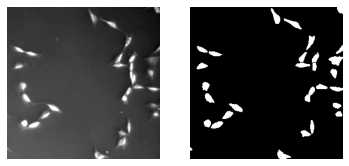

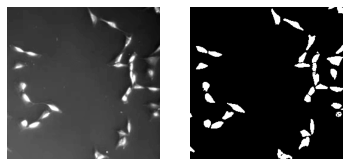

Accuracy: 0.9887404497931985
Number of cells in predictions: 17687
Number of cells in masks      : 16762


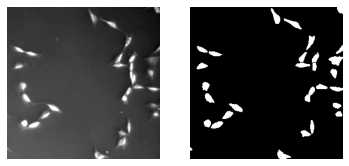

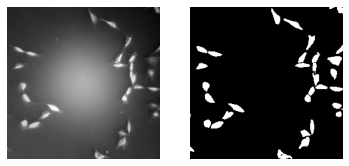

Accuracy: 0.9892524270450368
Number of cells in predictions: 17199
Number of cells in masks      : 16762


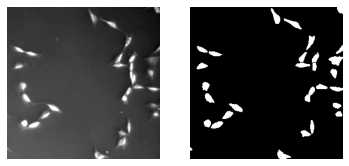

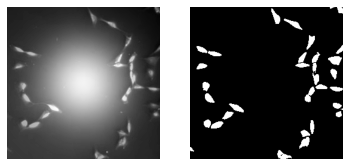

Accuracy: 0.9880951226926318
Number of cells in predictions: 16903
Number of cells in masks      : 16762


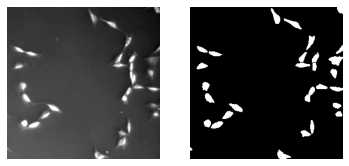

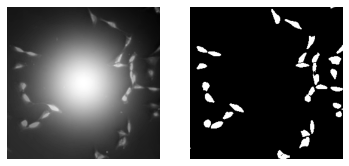

Accuracy: 0.986222749597886
Number of cells in predictions: 16575
Number of cells in masks      : 16762


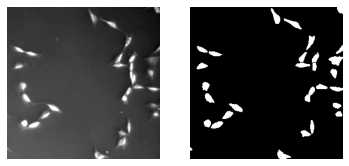

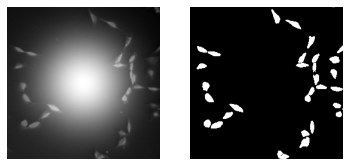

Accuracy: 0.983834779028799
Number of cells in predictions: 16287
Number of cells in masks      : 16762


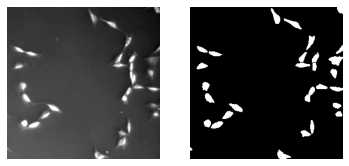

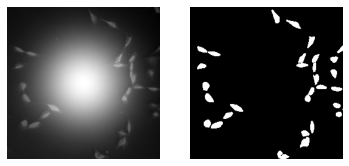

Accuracy: 0.9811213773839614
Number of cells in predictions: 15946
Number of cells in masks      : 16762


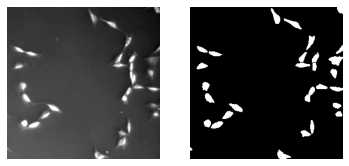

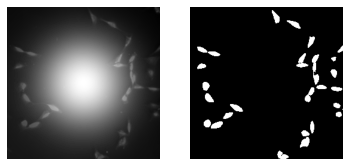

Accuracy: 0.9780860751282935
Number of cells in predictions: 15472
Number of cells in masks      : 16762


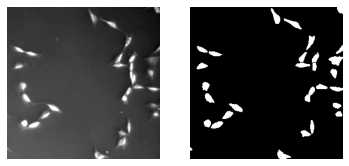

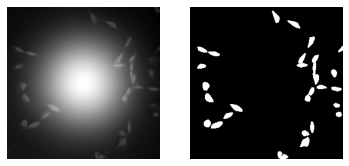

Accuracy: 0.9746355842141544
Number of cells in predictions: 14923
Number of cells in masks      : 16762


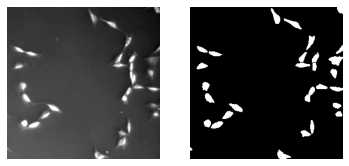

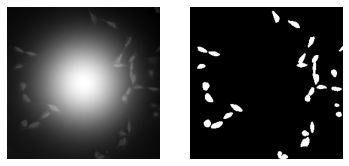

Accuracy: 0.9708410524854473
Number of cells in predictions: 14211
Number of cells in masks      : 16762


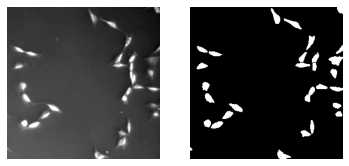

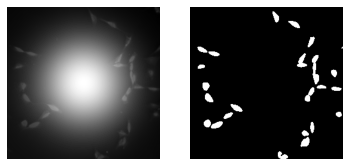

Accuracy: 0.9668013329599418
Number of cells in predictions: 13307
Number of cells in masks      : 16762


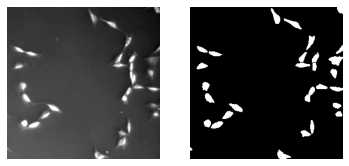

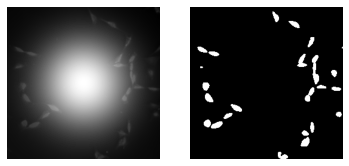

Accuracy: 0.9627159567440258
Number of cells in predictions: 12309
Number of cells in masks      : 16762


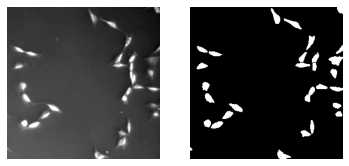

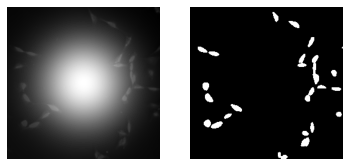

Accuracy: 0.9587999830058976
Number of cells in predictions: 11128
Number of cells in masks      : 16762


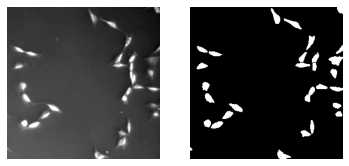

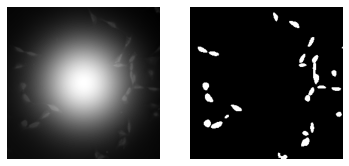

Accuracy: 0.9552501902860754
Number of cells in predictions: 10024
Number of cells in masks      : 16762


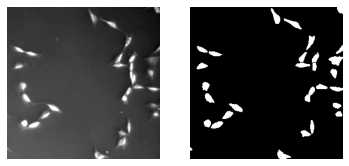

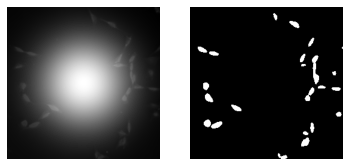

Accuracy: 0.9519679948395374
Number of cells in predictions: 8907
Number of cells in masks      : 16762


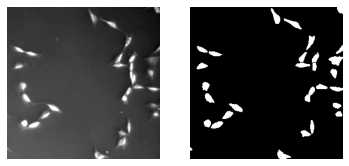

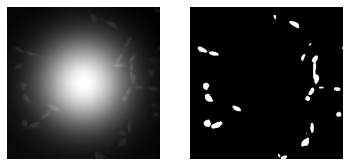

Accuracy: 0.9490289725509344
Number of cells in predictions: 7892
Number of cells in masks      : 16762


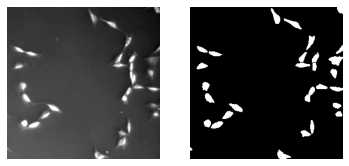

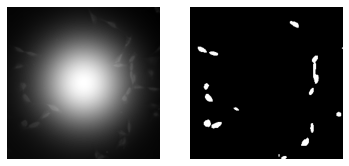

Accuracy: 0.9464737237668505
Number of cells in predictions: 6923
Number of cells in masks      : 16762


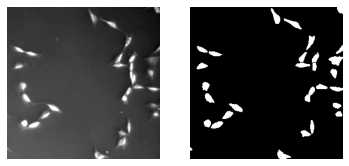

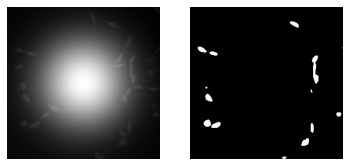

Accuracy: 0.9442345413507199
Number of cells in predictions: 6076
Number of cells in masks      : 16762


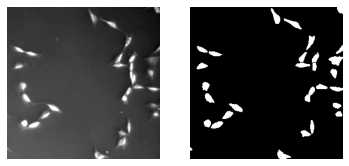

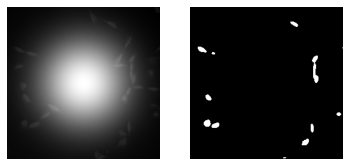

Accuracy: 0.9422550575405944
Number of cells in predictions: 5288
Number of cells in masks      : 16762


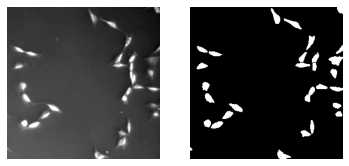

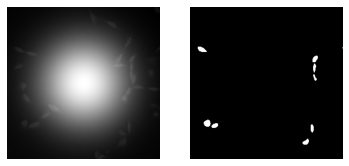

Accuracy: 0.9405238132850796
Number of cells in predictions: 4554
Number of cells in masks      : 16762


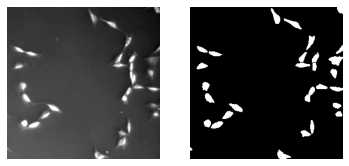

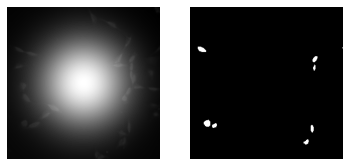

Accuracy: 0.938955508961397
Number of cells in predictions: 3902
Number of cells in masks      : 16762


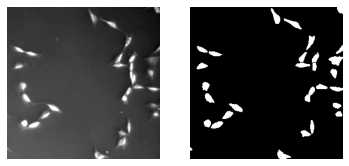

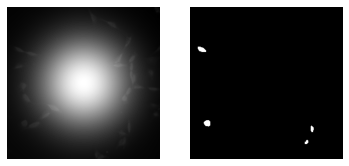

Accuracy: 0.9376244937672334
Number of cells in predictions: 3261
Number of cells in masks      : 16762


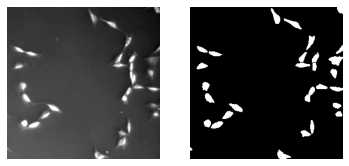

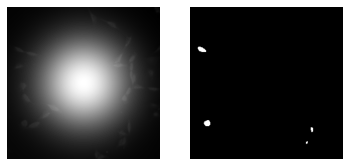

Accuracy: 0.9365169151156556
Number of cells in predictions: 2723
Number of cells in masks      : 16762


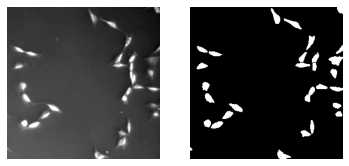

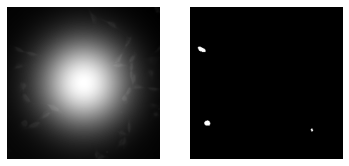

Accuracy: 0.9356220918543199
Number of cells in predictions: 2288
Number of cells in masks      : 16762


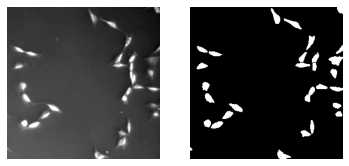

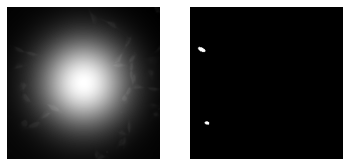

Accuracy: 0.9348739324831495
Number of cells in predictions: 1928
Number of cells in masks      : 16762


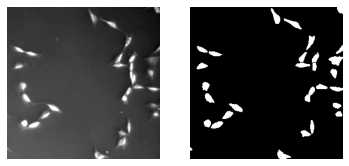

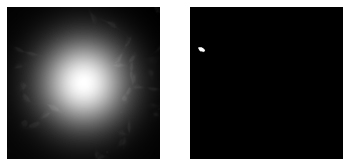

Accuracy: 0.9342312083524816
Number of cells in predictions: 1594
Number of cells in masks      : 16762


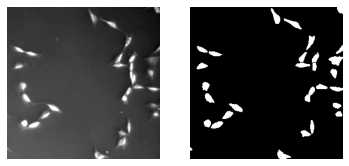

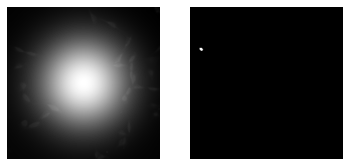

Accuracy: 0.9337430766984528
Number of cells in predictions: 1287
Number of cells in masks      : 16762


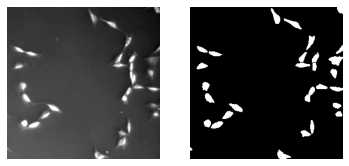

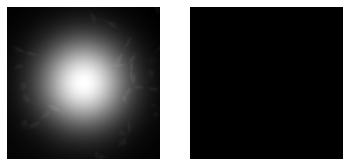

Accuracy: 0.9333465875363818
Number of cells in predictions: 1029
Number of cells in masks      : 16762


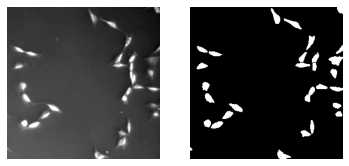

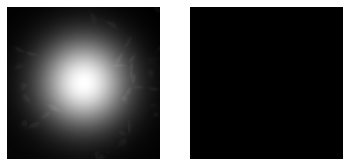

Accuracy: 0.9330504174325981
Number of cells in predictions: 809
Number of cells in masks      : 16762


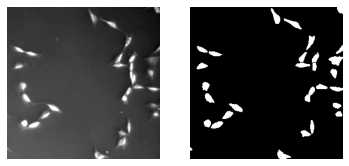

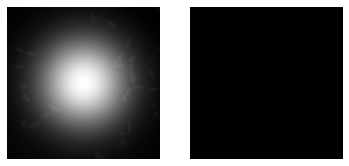

Accuracy: 0.9328203687480852
Number of cells in predictions: 649
Number of cells in masks      : 16762


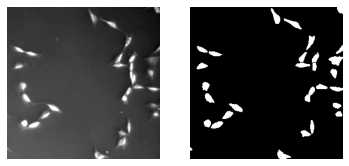

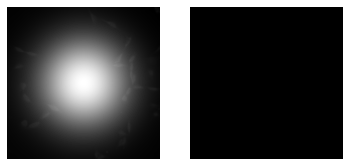

Accuracy: 0.932645461138557
Number of cells in predictions: 522
Number of cells in masks      : 16762


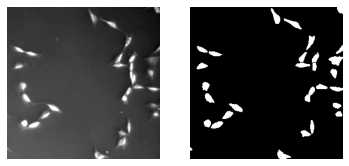

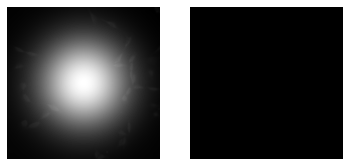

Accuracy: 0.9325069651884191
Number of cells in predictions: 408
Number of cells in masks      : 16762


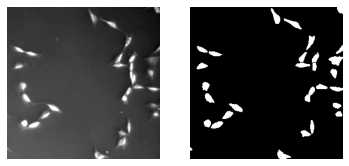

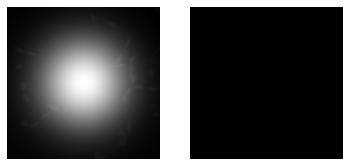

Accuracy: 0.9324062870998009
Number of cells in predictions: 320
Number of cells in masks      : 16762


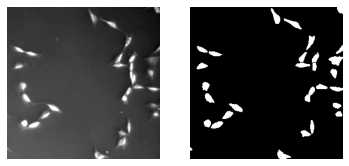

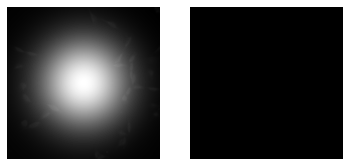

Accuracy: 0.9323342117608763
Number of cells in predictions: 238
Number of cells in masks      : 16762


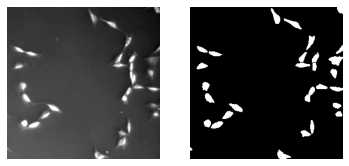

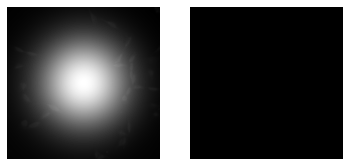

Accuracy: 0.9322900211109835
Number of cells in predictions: 190
Number of cells in masks      : 16762


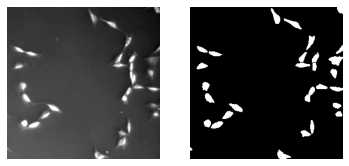

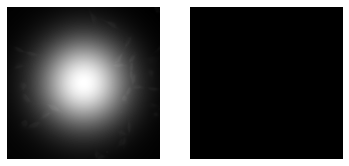

Accuracy: 0.9322496601179534
Number of cells in predictions: 153
Number of cells in masks      : 16762


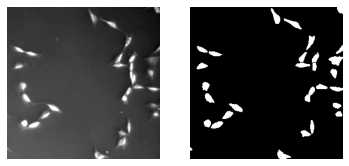

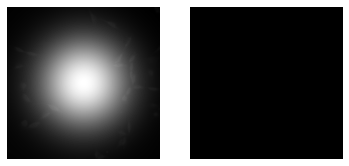

Accuracy: 0.9322241689644608
Number of cells in predictions: 118
Number of cells in masks      : 16762


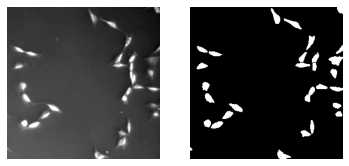

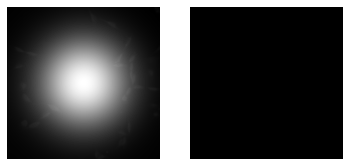

Accuracy: 0.9322076834884344
Number of cells in predictions: 95
Number of cells in masks      : 16762


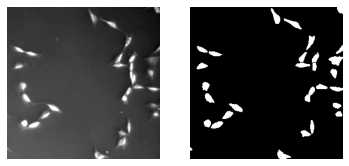

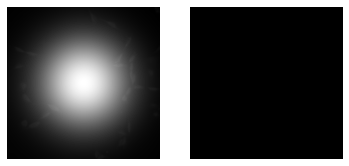

Accuracy: 0.9321943395278033
Number of cells in predictions: 73
Number of cells in masks      : 16762


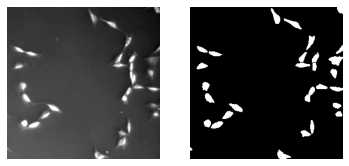

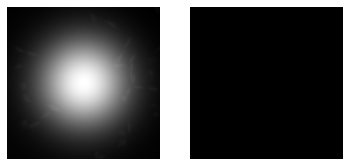

Accuracy: 0.9321847953048407
Number of cells in predictions: 62
Number of cells in masks      : 16762


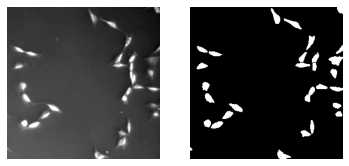

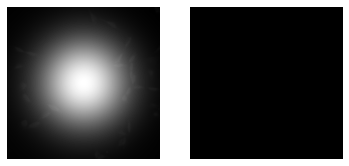

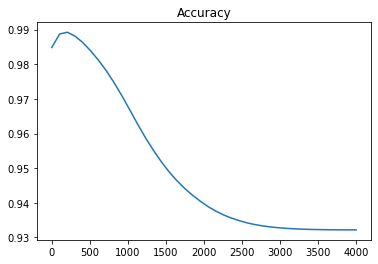

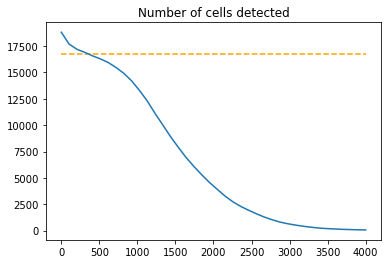

In [7]:
amplitudes = np.linspace(0, 4000, 40)
scores = []
number_cells_predictions = []
for amplitude in amplitudes:
    added_gaussian_test_images = []
    
    for image in test_images:
        added_gaussian_test_images.append(add_gaussian(image, amplitude))
    
    accuracy, n_cells_pred, _ = evaluate_model(np.array(added_gaussian_test_images), test_masks, model, number_cells_masks)
    scores.append(accuracy)
    number_cells_predictions.append(n_cells_pred)
    
    show_image_mask(test_images[0], test_masks[0])
    show_image_pred(added_gaussian_test_images[0], model)
    
plot_all(amplitudes, scores, number_cells_predictions, number_cells_masks)

Accuracy: 0.9955912571327359
Number of cells in predictions: 935
Number of cells in masks      : 13481


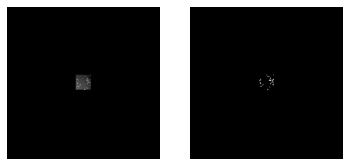

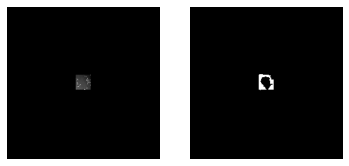

Accuracy: 0.9816550161324296
Number of cells in predictions: 14077
Number of cells in masks      : 16353


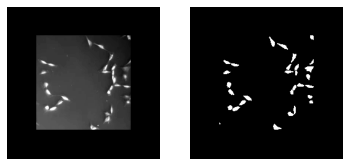

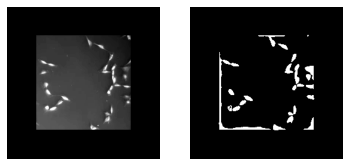

Accuracy: 0.9881942449831496
Number of cells in predictions: 13442
Number of cells in masks      : 12929


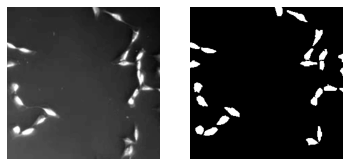

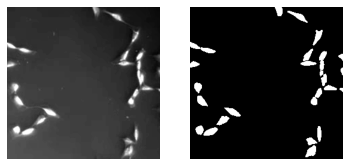

Accuracy: 0.9773775886086856
Number of cells in predictions: 7522
Number of cells in masks      : 6343


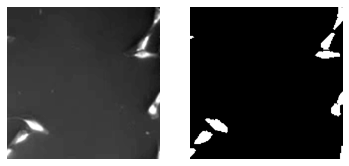

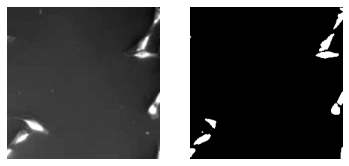

Accuracy: 0.9741834752699908
Number of cells in predictions: 4976
Number of cells in masks      : 3844


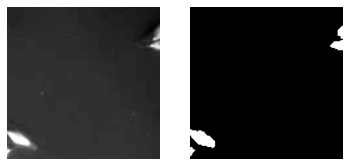

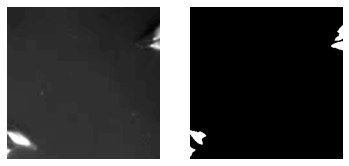

Accuracy: 0.9724151910520067
Number of cells in predictions: 3592
Number of cells in masks      : 2686


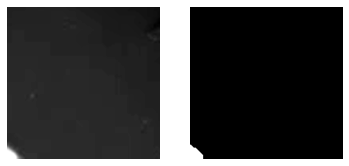

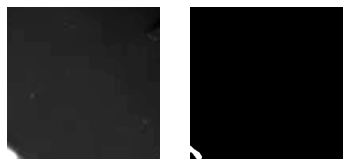

Accuracy: 0.9695386400409773
Number of cells in predictions: 2668
Number of cells in masks      : 1939


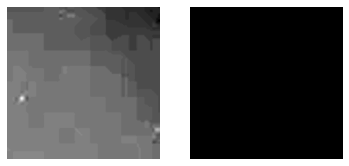

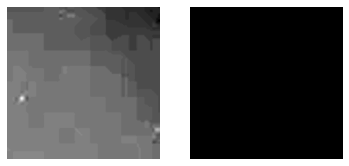

Accuracy: 0.9663979623831954
Number of cells in predictions: 2035
Number of cells in masks      : 1500


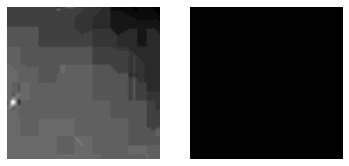

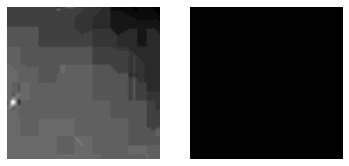

Accuracy: 0.962692320580576
Number of cells in predictions: 1706
Number of cells in masks      : 1217


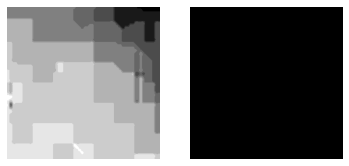

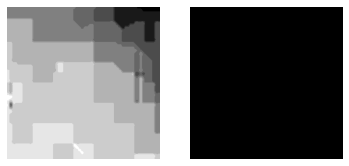

Accuracy: 0.9585585650275735
Number of cells in predictions: 1352
Number of cells in masks      : 993


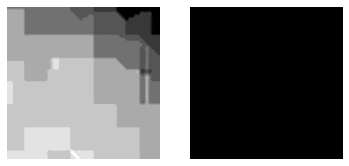

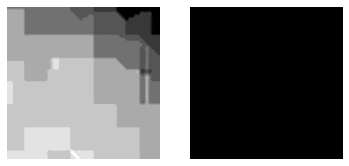

Accuracy: 0.9548779356713388
Number of cells in predictions: 1144
Number of cells in masks      : 842


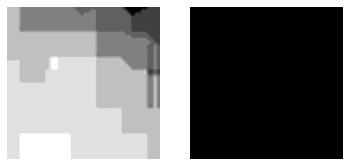

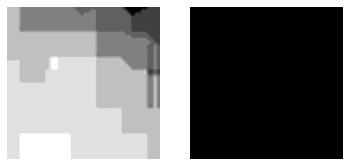

Accuracy: 0.9514911427217372
Number of cells in predictions: 966
Number of cells in masks      : 739


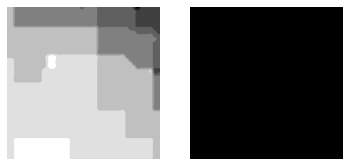

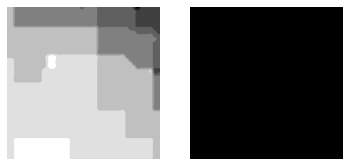

Accuracy: 0.9487392350739123
Number of cells in predictions: 825
Number of cells in masks      : 670


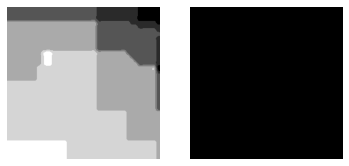

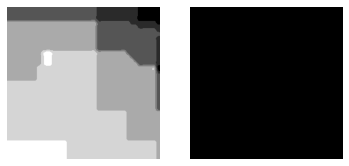

Accuracy: 0.9448806762695312
Number of cells in predictions: 741
Number of cells in masks      : 592


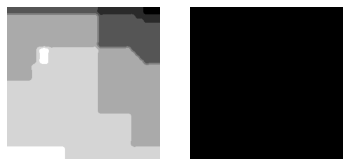

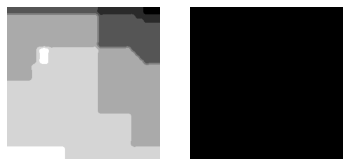

Accuracy: 0.942845183727788
Number of cells in predictions: 693
Number of cells in masks      : 542


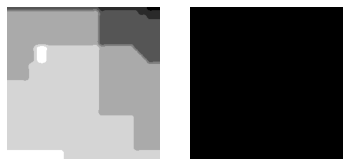

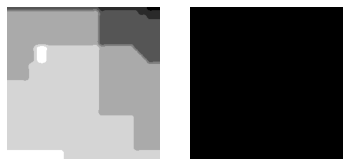

Accuracy: 0.940556126014859
Number of cells in predictions: 653
Number of cells in masks      : 503


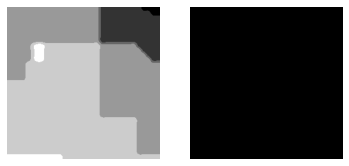

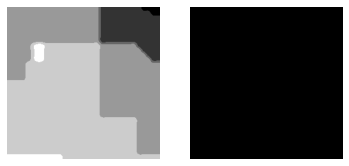

Accuracy: 0.9383552700865503
Number of cells in predictions: 555
Number of cells in masks      : 463


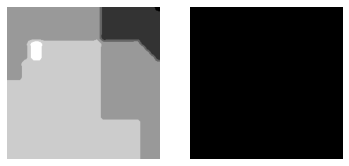

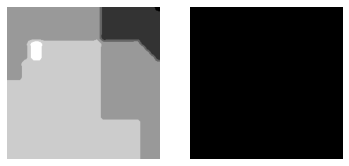

Accuracy: 0.9362028832529106
Number of cells in predictions: 449
Number of cells in masks      : 422


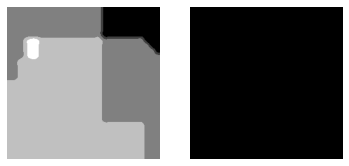

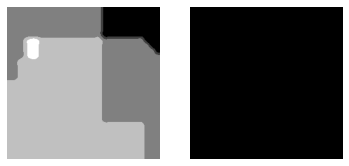

Accuracy: 0.9344026453354779
Number of cells in predictions: 352
Number of cells in masks      : 376


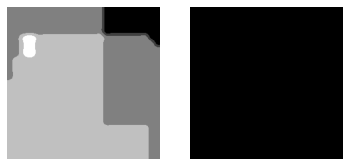

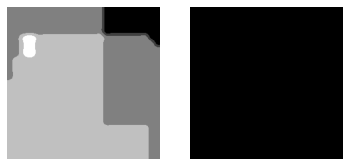

Accuracy: 0.9330176858340993
Number of cells in predictions: 269
Number of cells in masks      : 331


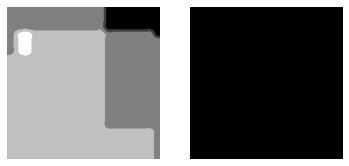

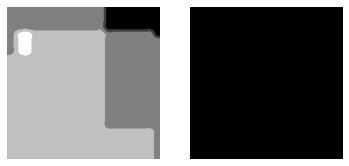

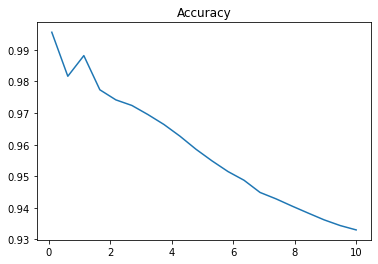

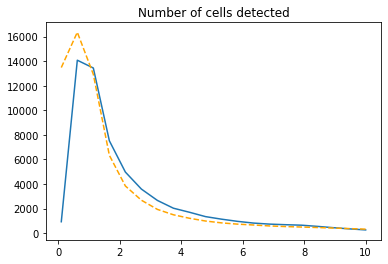

In [8]:
zooms = np.linspace(1e-1, 10, 20)
scores = []
number_cells_predictions = []
number_cells_masks_zoomed = []
for zoom in zooms:
    zoomed_test_images = []
    zoomed_test_masks = []
    
    for image, mask in zip(test_images, test_masks):
        zoomed_test_images.append(zoom_image(image, zoom))
        zoomed_test_masks.append(zoom_image(mask, zoom, val_padding=0))

    accuracy, n_cells_pred, n_cells_masks = evaluate_model(np.array(zoomed_test_images), np.array(zoomed_test_masks), model)
    scores.append(accuracy)
    number_cells_predictions.append(n_cells_pred)
    number_cells_masks_zoomed.append(n_cells_masks)
    
    show_image_mask(zoomed_test_images[0], zoomed_test_masks[0])
    show_image_pred(zoomed_test_images[0], model)
    
plot_all(zooms, scores, number_cells_predictions, number_cells_masks_zoomed)

Accuracy: 0.9848590626436121
Number of cells in predictions: 18812
Number of cells in masks      : 16762


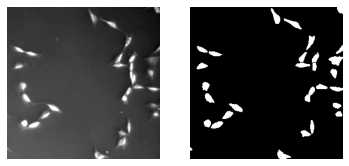

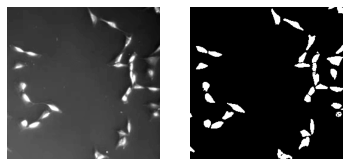

Accuracy: 0.9850332521924785
Number of cells in predictions: 20130
Number of cells in masks      : 16762


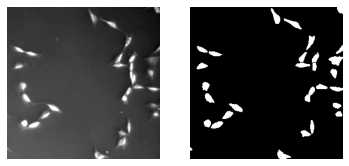

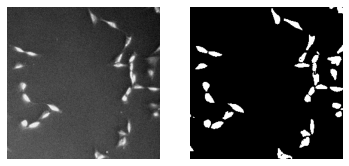

Accuracy: 0.9807256960401348
Number of cells in predictions: 31309
Number of cells in masks      : 16762


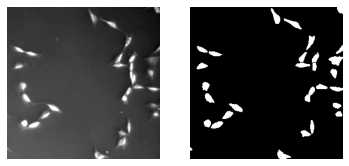

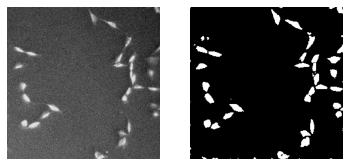

Accuracy: 0.9731434840782016
Number of cells in predictions: 47039
Number of cells in masks      : 16762


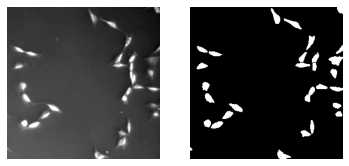

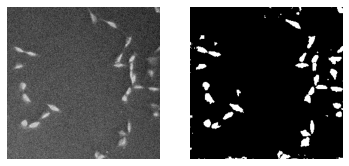

Accuracy: 0.964780979530484
Number of cells in predictions: 63604
Number of cells in masks      : 16762


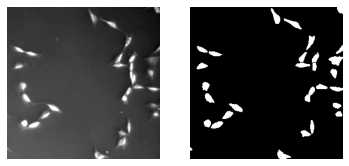

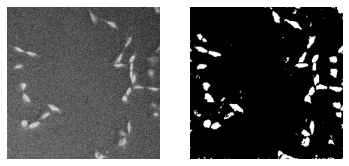

Accuracy: 0.9558798397288603
Number of cells in predictions: 83499
Number of cells in masks      : 16762


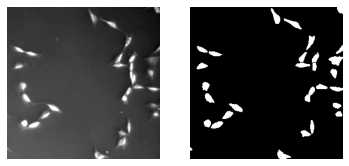

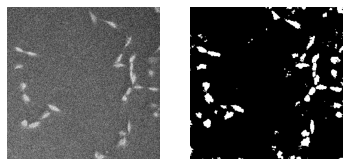

Accuracy: 0.9477434644512102
Number of cells in predictions: 101501
Number of cells in masks      : 16762


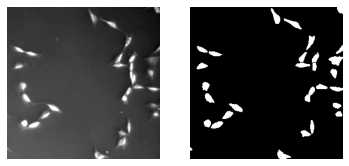

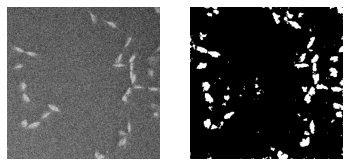

Accuracy: 0.9396001778396905
Number of cells in predictions: 121967
Number of cells in masks      : 16762


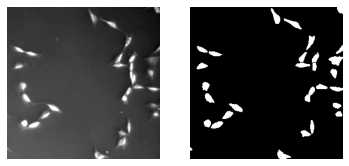

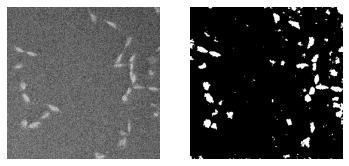

Accuracy: 0.9330917059206495
Number of cells in predictions: 136407
Number of cells in masks      : 16762


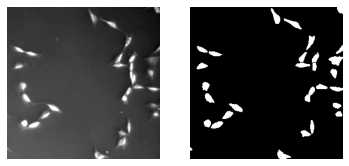

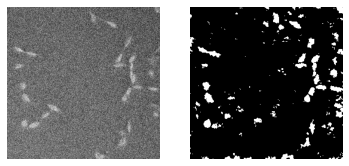

Accuracy: 0.9268476598403033
Number of cells in predictions: 151595
Number of cells in masks      : 16762


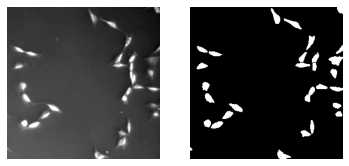

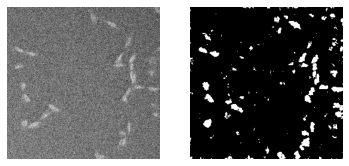

Accuracy: 0.9203276391122855
Number of cells in predictions: 169035
Number of cells in masks      : 16762


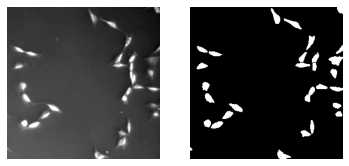

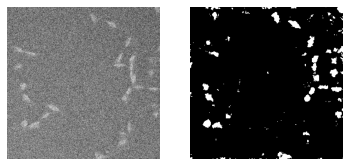

Accuracy: 0.9150983324237898
Number of cells in predictions: 180024
Number of cells in masks      : 16762


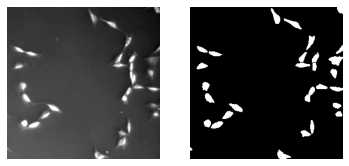

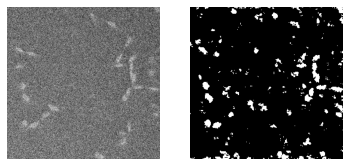

Accuracy: 0.9102234485102635
Number of cells in predictions: 189534
Number of cells in masks      : 16762


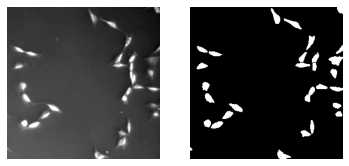

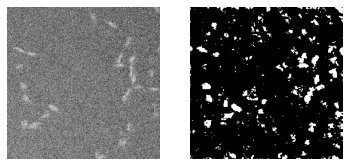

Accuracy: 0.9062061384612439
Number of cells in predictions: 200055
Number of cells in masks      : 16762


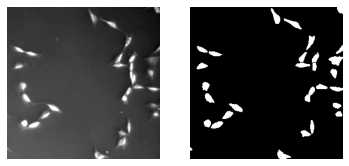

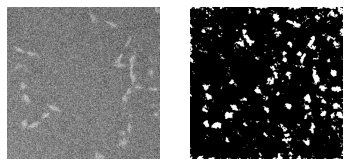

Accuracy: 0.9032427918677236
Number of cells in predictions: 206662
Number of cells in masks      : 16762


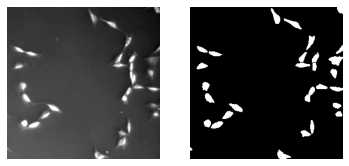

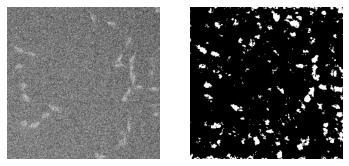

Accuracy: 0.8999201755897671
Number of cells in predictions: 214268
Number of cells in masks      : 16762


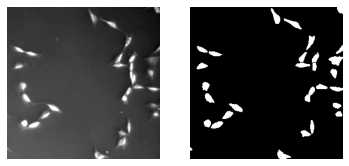

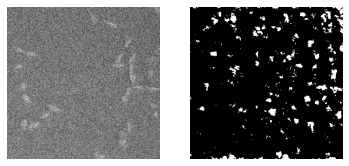

Accuracy: 0.8968287748448989
Number of cells in predictions: 222071
Number of cells in masks      : 16762


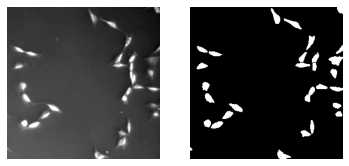

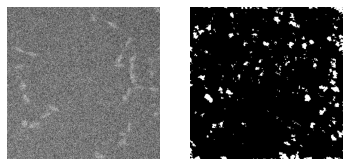

Accuracy: 0.8941904404584099
Number of cells in predictions: 228100
Number of cells in masks      : 16762


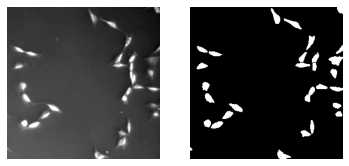

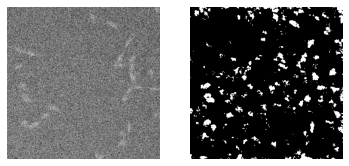

Accuracy: 0.8924960865693934
Number of cells in predictions: 230649
Number of cells in masks      : 16762


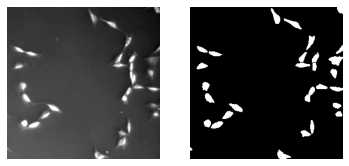

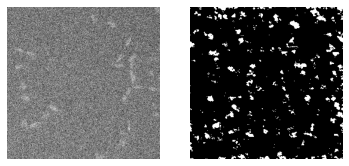

Accuracy: 0.8914867027133119
Number of cells in predictions: 229035
Number of cells in masks      : 16762


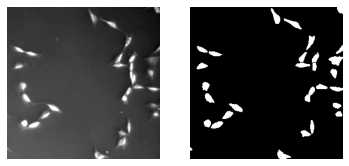

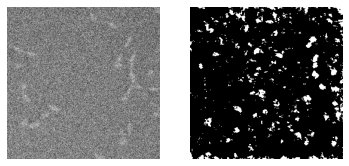

Accuracy: 0.8882172827627145
Number of cells in predictions: 239388
Number of cells in masks      : 16762


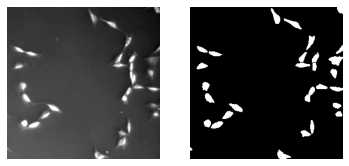

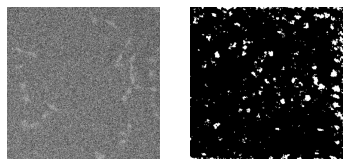

Accuracy: 0.8868430941712623
Number of cells in predictions: 244313
Number of cells in masks      : 16762


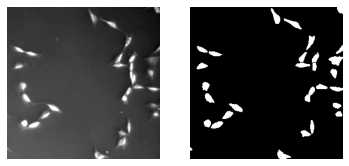

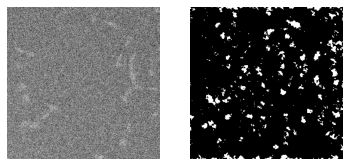

Accuracy: 0.8856256223192402
Number of cells in predictions: 245223
Number of cells in masks      : 16762


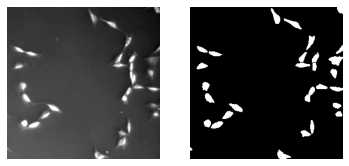

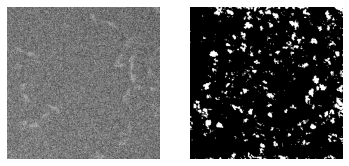

Accuracy: 0.883831667432598
Number of cells in predictions: 247393
Number of cells in masks      : 16762


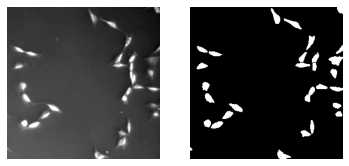

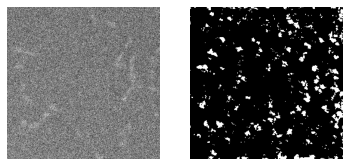

Accuracy: 0.8828793693991268
Number of cells in predictions: 250685
Number of cells in masks      : 16762


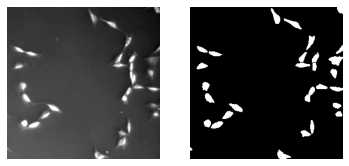

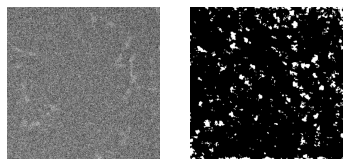

Accuracy: 0.8816280888576133
Number of cells in predictions: 251534
Number of cells in masks      : 16762


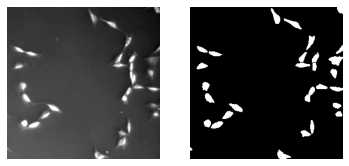

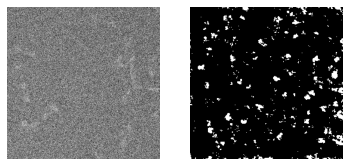

Accuracy: 0.8818124509325215
Number of cells in predictions: 250684
Number of cells in masks      : 16762


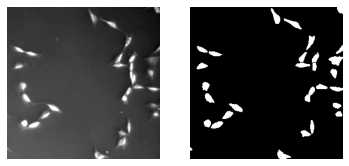

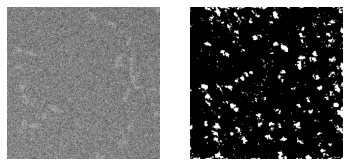

Accuracy: 0.8800064685297947
Number of cells in predictions: 255215
Number of cells in masks      : 16762


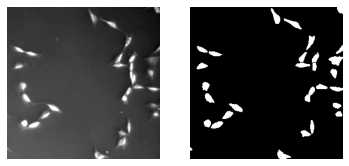

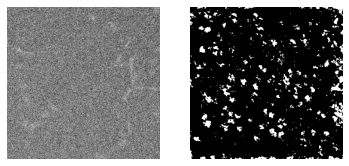

Accuracy: 0.8792953192018995
Number of cells in predictions: 257070
Number of cells in masks      : 16762


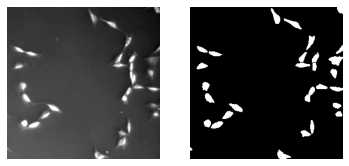

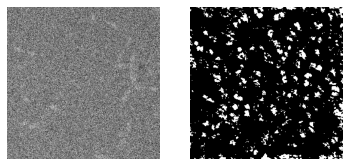

Accuracy: 0.8790683821135876
Number of cells in predictions: 255029
Number of cells in masks      : 16762


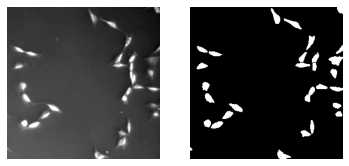

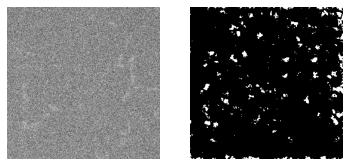

Accuracy: 0.8778744267482383
Number of cells in predictions: 257435
Number of cells in masks      : 16762


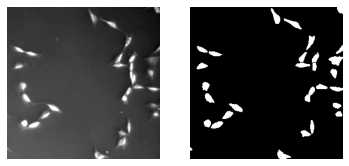

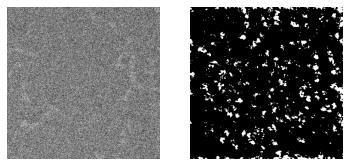

Accuracy: 0.8772548600739124
Number of cells in predictions: 259375
Number of cells in masks      : 16762


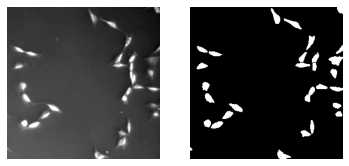

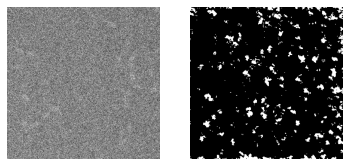

Accuracy: 0.8769357120289522
Number of cells in predictions: 259057
Number of cells in masks      : 16762


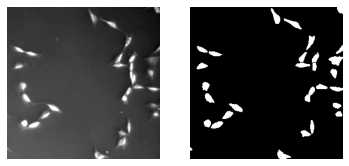

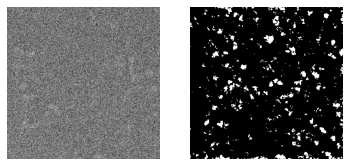

Accuracy: 0.8760229970894607
Number of cells in predictions: 261069
Number of cells in masks      : 16762


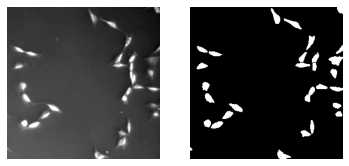

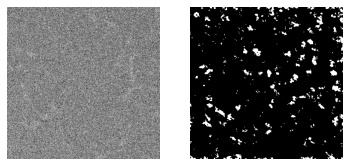

Accuracy: 0.8754723941578585
Number of cells in predictions: 264545
Number of cells in masks      : 16762


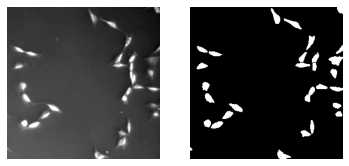

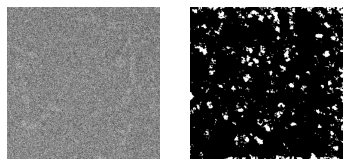

Accuracy: 0.875340420592065
Number of cells in predictions: 262387
Number of cells in masks      : 16762


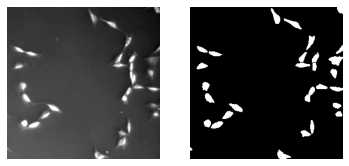

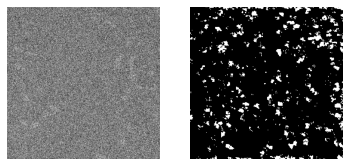

Accuracy: 0.8744300991881128
Number of cells in predictions: 264007
Number of cells in masks      : 16762


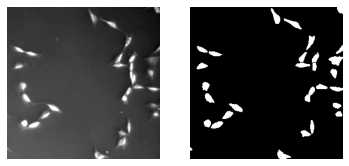

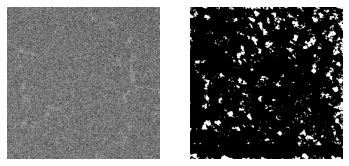

Accuracy: 0.8741581037932751
Number of cells in predictions: 263891
Number of cells in masks      : 16762


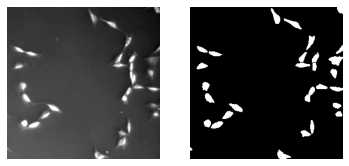

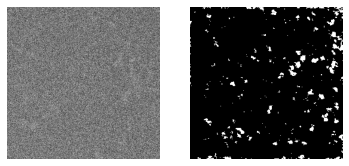

Accuracy: 0.8738783593271293
Number of cells in predictions: 264055
Number of cells in masks      : 16762


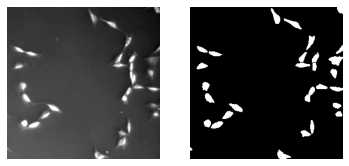

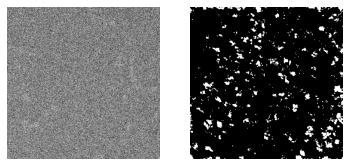

Accuracy: 0.873596819709329
Number of cells in predictions: 266211
Number of cells in masks      : 16762


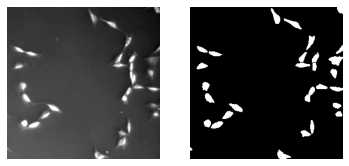

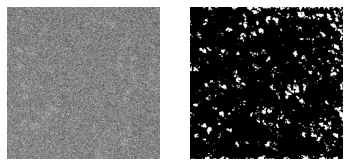

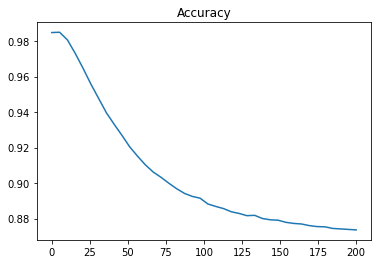

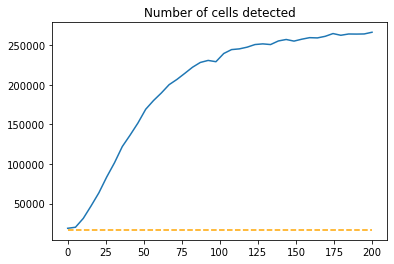

In [10]:
mean = 0
sigmas = np.linspace(0, 200, 40)
scores = []
number_cells_predictions = []
for sigma in sigmas:
    noisy_test_images = []

    for image in test_images:
        noisy_test_images.append(add_gaussian_noise(image, mean, sigma))

    accuracy, n_cells_pred, _ = evaluate_model(np.array(noisy_test_images), test_masks, model, number_cells_masks)
    scores.append(accuracy)
    number_cells_predictions.append(n_cells_pred)
    
    show_image_mask(test_images[0], test_masks[0])
    show_image_pred(noisy_test_images[0], model)
        
plot_all(sigmas, scores, number_cells_predictions, number_cells_masks)